Checkpoint Objective

Decision Trees & Random Forests

We are going to predict once again if a passenger on the Titanic is going to survive. This time  using decision trees and random forests: 

1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics  
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import graphviz

In [2]:
df = pd.read_csv('titanic-passengers.csv', sep = ';')

In [3]:
df= df.drop(['PassengerId','Name','Cabin', 'Ticket', 'Fare', 'Parch'], axis=1)
df.dropna(inplace = True)

In [4]:
df['Age'].fillna(int(df['Age'].mean()),inplace=True)
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
df['Age_categories']= pd.cut(df.Age, interval, labels = categories)
df['Age_categories']= encoder.fit_transform(df['Age_categories'])

In [5]:
df['Sex']= encoder.fit_transform(df['Sex'])
df['Embarked']= encoder.fit_transform(df['Embarked'])
df['Survived']= encoder.fit_transform(df['Survived'])

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Age_categories
0,0,2,1,28.0,0,2,3
1,0,3,1,25.0,0,2,3
2,0,3,1,20.0,0,2,3
3,0,3,0,29.0,0,2,3
4,0,1,1,31.0,1,2,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        712 non-null    int32  
 1   Pclass          712 non-null    int64  
 2   Sex             712 non-null    int32  
 3   Age             712 non-null    float64
 4   SibSp           712 non-null    int64  
 5   Embarked        712 non-null    int32  
 6   Age_categories  712 non-null    int32  
dtypes: float64(1), int32(4), int64(2)
memory usage: 33.4 KB


In [17]:
x=df[['Sex', 'SibSp', 'Age_categories']]
y= df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


clf= tree.DecisionTreeClassifier(splitter='best', max_depth=None)  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8181818181818182


2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

In [18]:
Titles= df.columns.tolist()
classes= {0 : 'died', 1 : 'Survived'}

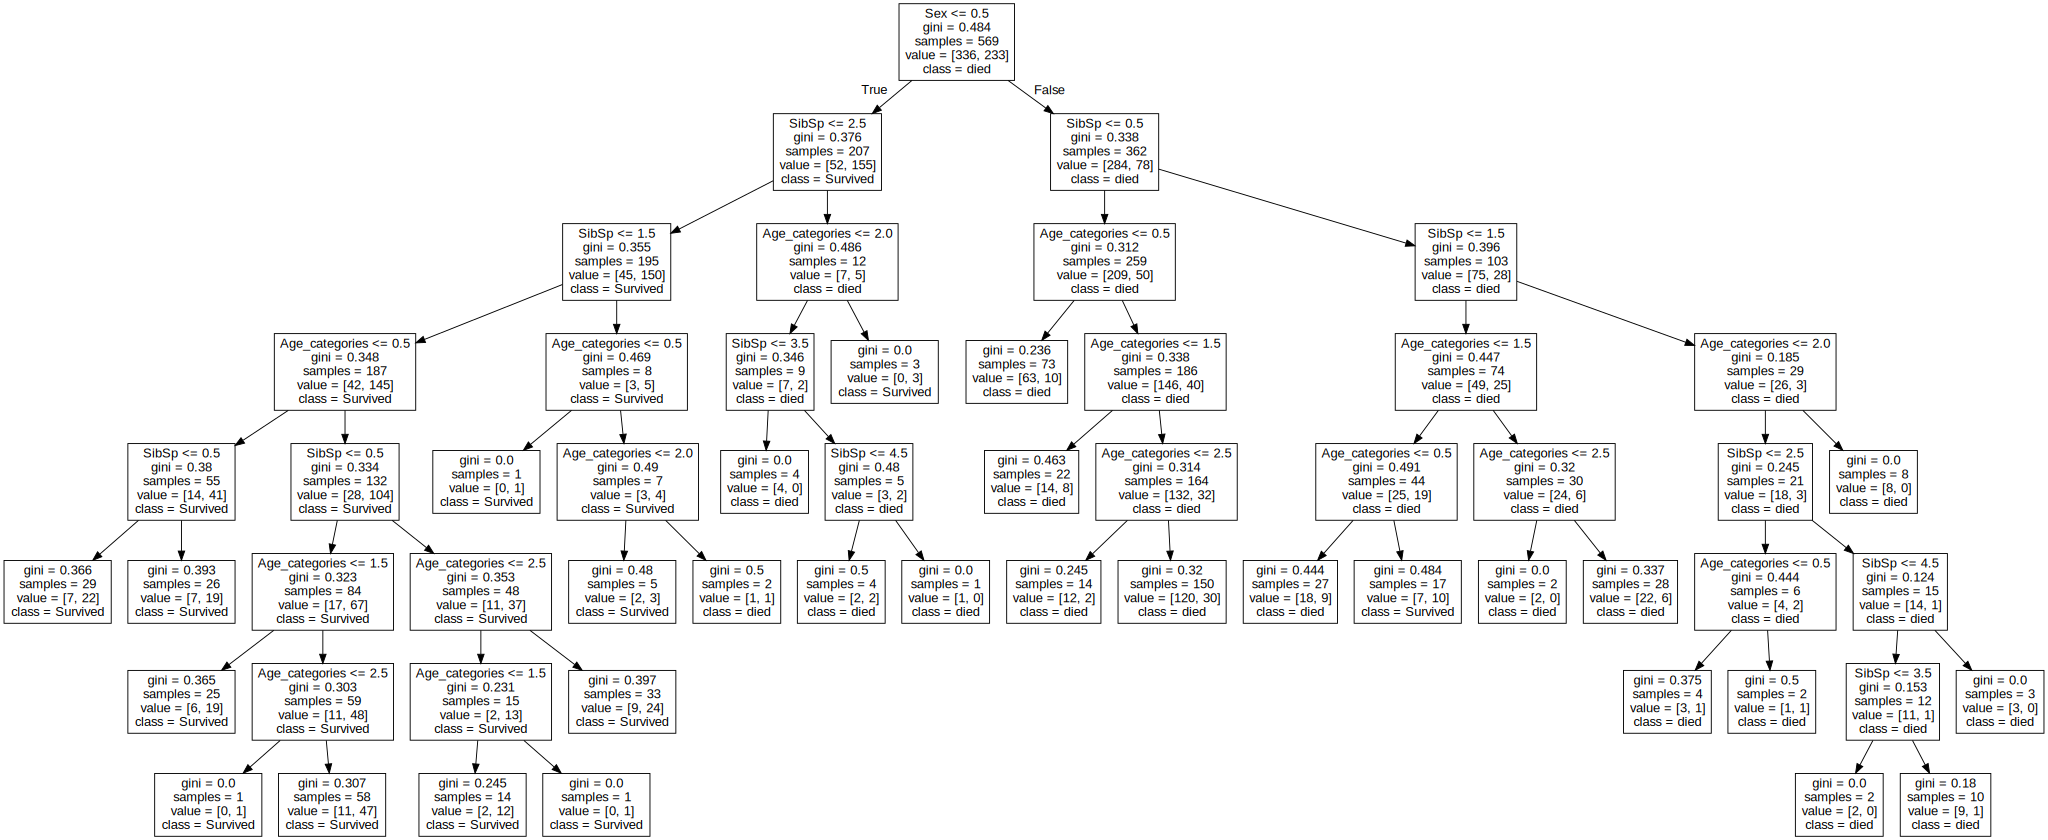

In [19]:
clf_features= Titles[2] , Titles[4], Titles[6]
data= tree.export_graphviz(clf, feature_names = clf_features, class_names = classes, out_file=None)
graph= graphviz.Source(data)
graph.render('data')
graph

3. Change the decision tree parameters(at least two parameters). 

In [20]:
x=df[['Sex', 'SibSp', 'Age_categories']]
y= df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


clf= tree.DecisionTreeClassifier(splitter='random', max_depth=5) 
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8321678321678322


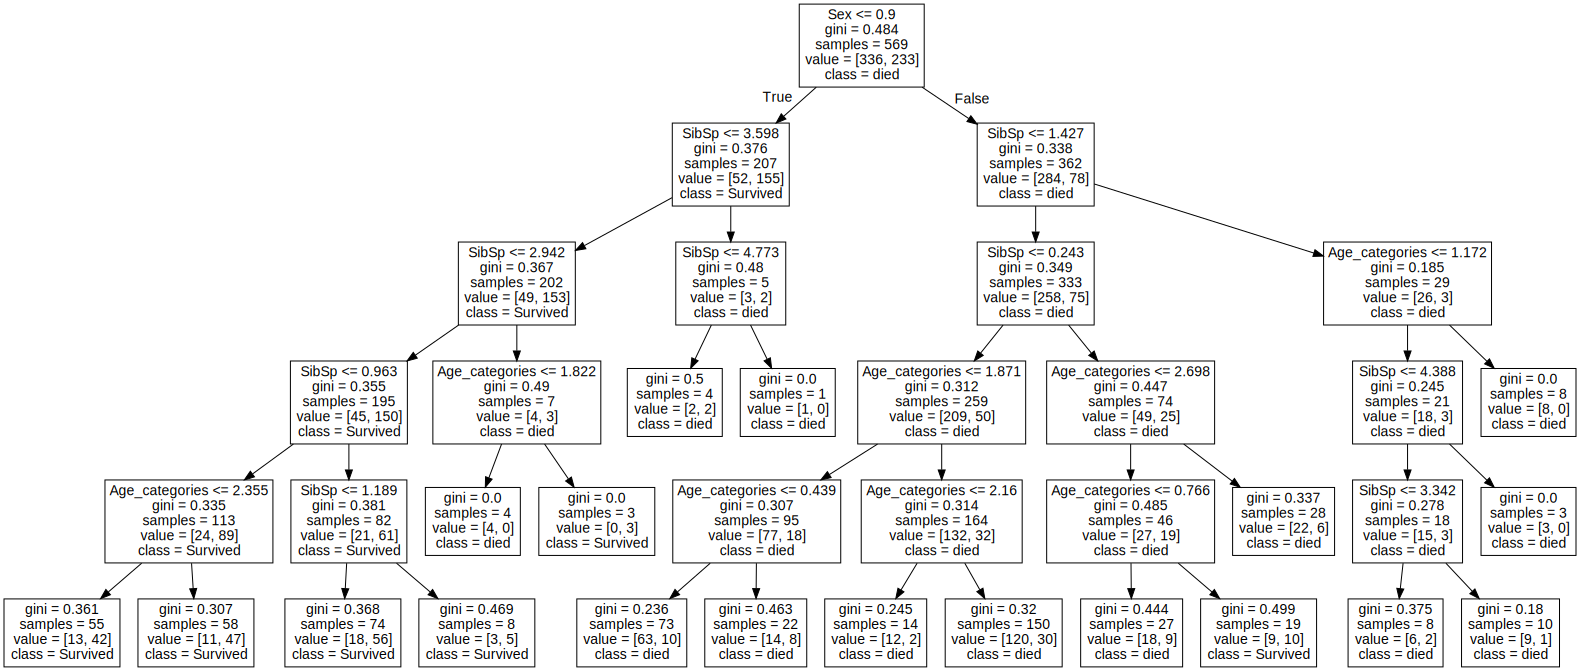

In [21]:
clf_features= Titles[2] , Titles[4], Titles[6]
data= tree.export_graphviz(clf, feature_names = clf_features, class_names = classes, out_file=None)
graph= graphviz.Source(data)
graph.render('data')
graph

4. Calculate the new accuracy and compare it with the previous results. 

In [22]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8321678321678322


5. Use a random forest then change the number of estimators.

In [14]:
X=df[['Sex', 'Age_categories', 'SibSp']] 
y=df['Survived']
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) 

clfR=RandomForestClassifier(n_estimators=10)  
clfR.fit(x_train, y_train)  
y_pred=clfR.predict(x_test)  

6. Calculate the new accuracy and compare it with the previous result.

In [15]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7616822429906542


In [16]:
X=df[['Sex', 'Age_categories', 'SibSp']] 
y=df['Survived']
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) 

clfR=RandomForestClassifier(n_estimators=5)  
clfR.fit(x_train, y_train)  
y_pred=clfR.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.794392523364486
